In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set dataset paths

In [3]:
# Dataset Paths
data_dir = "./dataset"  # Modify with actual dataset path
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load Dataset
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=False)


Found 11452 images belonging to 64 classes.
Found 1400 images belonging to 64 classes.
Found 1525 images belonging to 64 classes.


# Get class labels

In [4]:
class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)


Class Labels: ['antelope', 'bear', 'beaver', 'bee', 'bison', 'blackbird', 'buffalo', 'butterfly', 'camel', 'cat', 'cheetah', 'chimpanzee', 'chinchilla', 'cow', 'crab', 'crocodile', 'deer', 'dog', 'dolphin', 'donkey', 'duck', 'eagle', 'elephant', 'falcon', 'ferret', 'flamingo', 'fox', 'frog', 'giraffe', 'goat', 'goose', 'gorilla', 'grasshopper', 'hawk', 'hedgehog', 'hippopotamus', 'hyena', 'iguana', 'jaguar', 'kangaroo', 'koala', 'lemur', 'leopard', 'lizard', 'lynx', 'mole', 'mongoose', 'ostrich', 'otter', 'owl', 'panda', 'peacock', 'penguin', 'porcupine', 'raccoon', 'seal', 'sheep', 'snail', 'snake', 'spider', 'squid', 'walrus', 'whale', 'wolf']


# Define CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,066,496 (72.73 MB)

 Trainable params: 19,066,496 (72.73 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [7]:

model.fit(train_generator, validation_data=val_generator, epochs=10)


c:\Users\sanjay\Desktop\CNN\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.0681 - loss: 3.8584 - val_accuracy: 0.4621 - val_loss: 1.9372
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 285s 796ms/step - accuracy: 0.3772 - loss: 2.2668 - val_accuracy: 0.6607 - val_loss: 1.2364
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 291s 812ms/step - accuracy: 0.5562 - loss: 1.5302 - val_accuracy: 0.7350 - val_loss: 0.9876
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 287s 801ms/step - accuracy: 0.6650 - loss: 1.1404 - val_accuracy: 0.6557 - val_loss: 1.3994
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 285s 795ms/step - accuracy: 0.7056 - loss: 0.9885 - val_accuracy: 0.7021 - val_loss: 1.2396
Epoch 6/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 332s 926ms/step - accuracy: 0.7517 - loss: 0.8329 - val_accuracy: 0.7121 - val_loss: 1.1471
Epoch 7/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 324s 904ms/step - accuracy: 0.7741 - loss: 0.7363 - val_accuracy: 0.8007 - val_loss: 0.8271
Epoch 8/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 322s 897ms/step - accuracy: 0.7984 - lo

# Save Model

In [15]:
model_dir = "./Model"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "animal_classification_model.h5")
model.save(model_path)
print(f"Model saved at: {model_path}")

Model saved at: ./Model\animal_classification_model.h5


#  Model Evaluation

In [9]:
y_true = []
y_pred = []

for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━

# Classification Report & Confusion Matrix

Classification Report:
               precision    recall  f1-score   support

    antelope       1.00      0.74      0.85        23
        bear       0.96      0.96      0.96        23
      beaver       0.51      0.96      0.67        23
         bee       0.95      0.87      0.91        23
       bison       0.83      0.87      0.85        23
   blackbird       1.00      0.91      0.95        23
     buffalo       0.93      0.61      0.74        23
   butterfly       0.72      1.00      0.84        23
       camel       0.91      0.91      0.91        23
         cat       0.97      0.84      0.90        44
     cheetah       0.68      0.57      0.62        23
  chimpanzee       0.95      0.87      0.91        23
  chinchilla       1.00      0.91      0.95        23
         cow       0.96      0.96      0.96        23
        crab       0.96      1.00      0.98        23
   crocodile       0.66      0.91      0.76        23
        deer       0.65      0.65      0.65        23
   

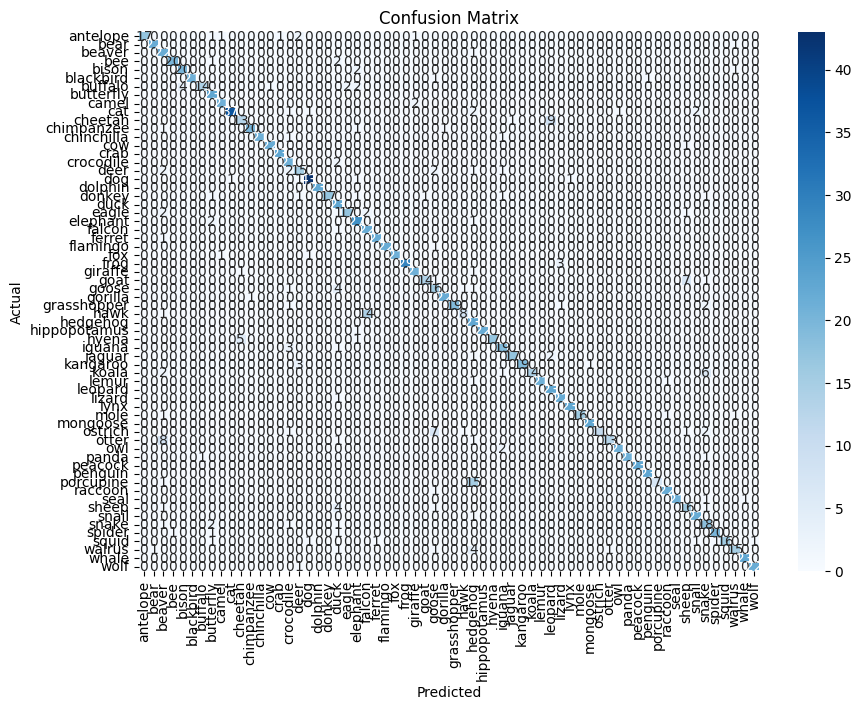

In [10]:
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(train_generator.class_indices.keys()), yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Prediction Function

In [11]:
def predict_image(image_path, model, class_labels):
    # Read and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (150, 150)) / 255.0
    img_expanded = np.expand_dims(img_resized, axis=0)

    # Make prediction
    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    label = f"Predicted: {class_labels[predicted_class]} ({confidence*100:.2f}%)"
    
# Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(label, fontsize=12, fontweight="bold", color="red")
    plt.show()

    return label

# image Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


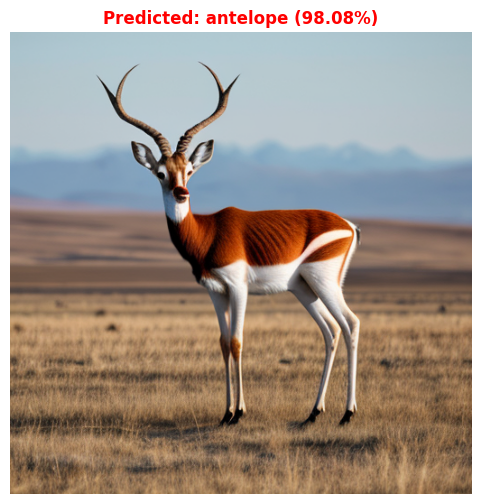

'Predicted: antelope (98.08%)'

In [14]:
image_path = r"CNN\dataset\test\antelope\00018-2074659884.png"
predict_image(image_path, model, class_labels)